In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [111]:

def linear(x, a, b):
    return x @ a + b          # (n,) vector

def logistic(x, a, b):
    z = linear(x, a, b)
    z = np.clip(z, -50, 50)   # avoid overflow
    return 1 / (1 + np.exp(-z))

def loss_fn(data, a, b):
    x = data[:, :2]
    y = data[:, 2]
    y_hat = logistic(x, a, b)
    y_hat = np.clip(y_hat, 1e-10, 1 - 1e-10)
    n = len(y)
    return -(1/n) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [112]:
def update():
    pass

In [113]:


def GD(data, a, b, lr=0.01):
    x = data[:, :2]
    y = data[:, 2]
    sig = logistic(x, a, b)
    error = sig - y
    da = (x.T @ error) / len(x)   # shape (2,)
    db = error.mean()             # scalar
    return a - lr * da, b - lr * db

In [114]:

a0 = (np.random.rand(2)*100)
b0= (np.random.rand(1)*100)[0]

In [115]:
a0

array([34.35458864, 79.03555764])

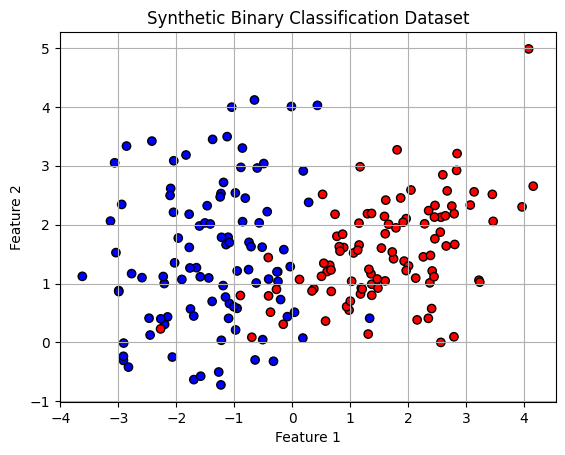

In [116]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
X, y = make_classification(
    n_samples=200,      # total number of samples
    n_features=2,       # number of features
    n_redundant=0,      # no redundant features
    n_informative=2,    # both features contribute to the decision boundary
    n_clusters_per_class=1,
    flip_y=0.01,        # noise: fraction of labels to randomly flip
    class_sep=1.5,      # how separable the classes are
    random_state=42     # for reproducibility
)

# Visualise
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title("Synthetic Binary Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [117]:

data = np.hstack([X, y.reshape(-1, 1)]) 
data

array([[-3.72928982e-01,  5.13041998e-01,  1.00000000e+00],
       [ 1.81293463e+00,  3.27053357e+00,  1.00000000e+00],
       [ 2.84042818e+00,  2.92099601e+00,  1.00000000e+00],
       [ 2.79454774e+00,  9.56198119e-02,  1.00000000e+00],
       [ 1.44410516e+00,  9.77240904e-01,  1.00000000e+00],
       [-6.19596886e-01,  1.00891314e+00,  0.00000000e+00],
       [ 6.51084697e-01,  1.31007677e+00,  1.00000000e+00],
       [-5.07454407e-01,  4.71574354e-02,  0.00000000e+00],
       [-1.75396925e+00,  5.67692362e-01,  0.00000000e+00],
       [-7.43924147e-01,  1.69979806e+00,  0.00000000e+00],
       [-2.42089280e+00,  3.41894990e+00,  0.00000000e+00],
       [-1.19373085e-02,  4.00578584e+00,  0.00000000e+00],
       [ 2.75751204e+00,  2.31515089e+00,  1.00000000e+00],
       [-3.62190908e+00,  1.12220145e+00,  0.00000000e+00],
       [ 2.37768113e+00,  1.01095984e+00,  1.00000000e+00],
       [-3.21445821e-02,  1.28719280e+00,  0.00000000e+00],
       [ 9.84048087e-01,  5.48438417e-01

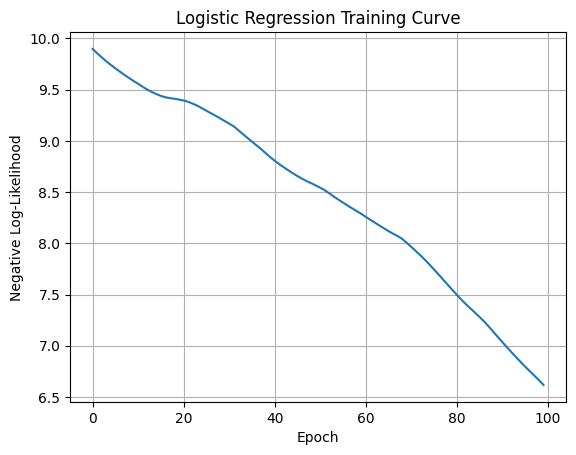

In [127]:
# params 

epochs = 100
lr = 0.5

a_hist = [a0]
b_hist = [b0]
loss_hist = []

for epoch in range(epochs):
    a_curr, b_curr = a_hist[-1], b_hist[-1]
    loss = loss_fn(data, a_curr, b_curr)
    loss_hist.append(loss)
    a_next, b_next = GD(data, a_curr, b_curr, lr)
    a_hist.append(a_next)
    b_hist.append(b_next)

# ----- plot training curve -----
plt.figure()
plt.plot(loss_hist)
plt.xlabel("Epoch")
plt.ylabel("Negative Log-Likelihood")
plt.title("Logistic Regression Training Curve")
plt.grid(True)
plt.show()